# Load the data frame

In [404]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [405]:
import numpy as np
import pandas as pd

In [406]:
laptops = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/Laptop Price Predictor/laptop_price.csv', encoding = 'latin1')

In [407]:
laptops.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Data Cleaning

In [408]:
laptops.isna().sum()  # check for NA's

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [409]:
laptops.duplicated().sum()  # No duplicates

0

In [410]:
laptops.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [411]:
laptops.shape  # more data will give us stronger data

(1303, 13)

In [412]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [413]:
# Remove unnecessary columns
laptops.drop(columns=['laptop_ID'], inplace = True)

In [414]:
# remove the string gb from the ram information
laptops['Ram'] = laptops['Ram'].str.replace('GB','')
laptops['Weight'] = laptops['Weight'].str.replace('kg','')

In [415]:
laptops.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00


In [416]:
# change the datatypes of the data
laptops['Ram']=laptops['Ram'].astype('int32')
laptops['Weight']=laptops['Weight'].astype('float32')

Also try converting the price column into Dollars from Euros

# Exploratary Data Analysis

In [417]:
import seaborn as sns
import matplotlib.pyplot as plt

In [418]:
laptops.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69


## Price column

<ipython-input-419-1eecd0b73d45>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptops['Price_euros'])  # skewed


<Axes: xlabel='Price_euros', ylabel='Density'>

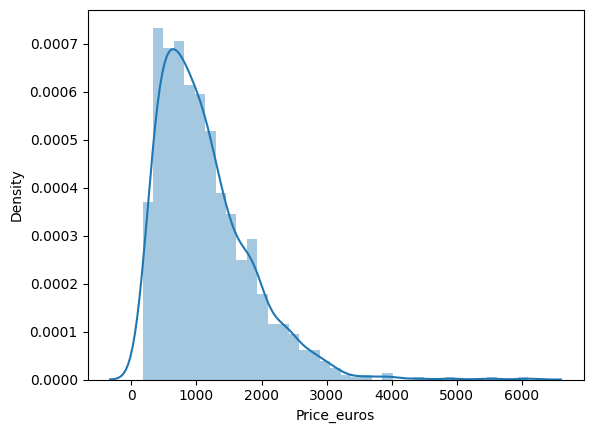

In [419]:
sns.distplot(laptops['Price_euros'])  # skewed

## Company column

<Axes: xlabel='Company'>

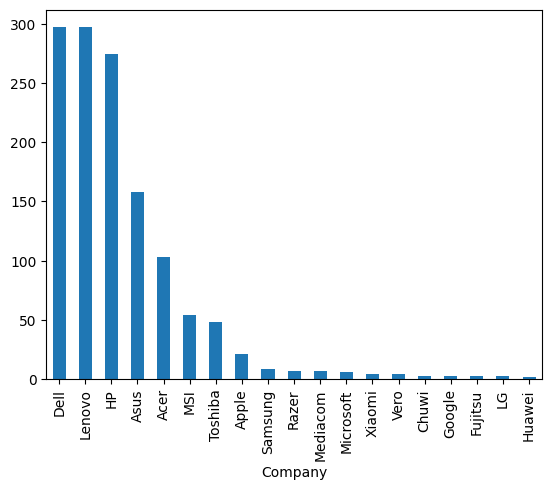

In [420]:
laptops['Company'].value_counts().plot(kind='bar')

<function matplotlib.pyplot.show(close=None, block=None)>

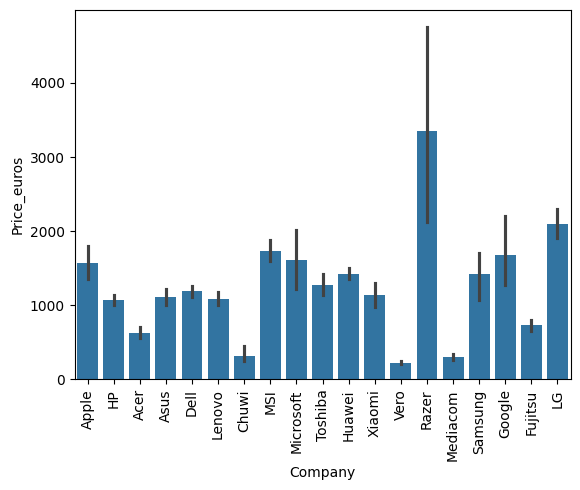

In [421]:
# average price values of each brand
sns.barplot(x=laptops['Company'], y =laptops['Price_euros'])
plt.xticks(rotation='vertical')
plt.show

## Typename column

<Axes: xlabel='TypeName'>

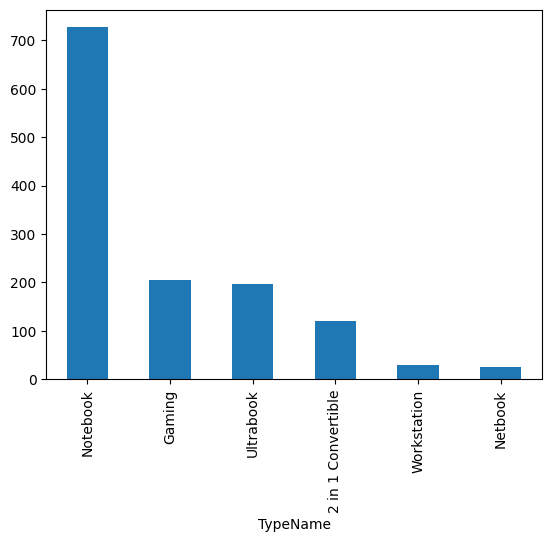

In [422]:
laptops['TypeName'].value_counts().plot(kind='bar')

<function matplotlib.pyplot.show(close=None, block=None)>

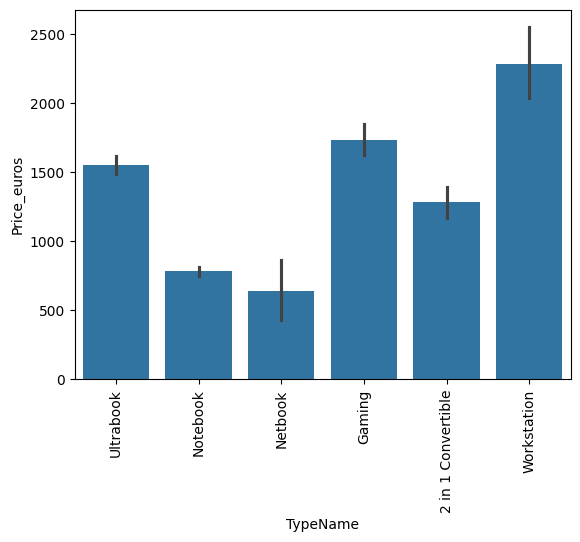

In [423]:
sns.barplot(x=laptops['TypeName'], y =laptops['Price_euros'])
plt.xticks(rotation='vertical')
plt.show

## Inches Column

<Axes: xlabel='Inches', ylabel='Price_euros'>

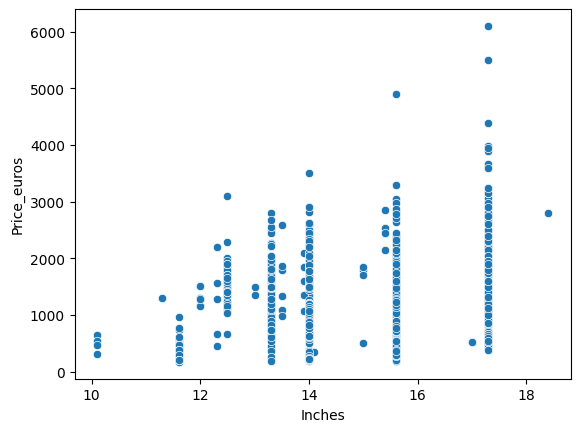

In [424]:
sns.scatterplot(x=laptops['Inches'], y=laptops['Price_euros'])

<function matplotlib.pyplot.show(close=None, block=None)>

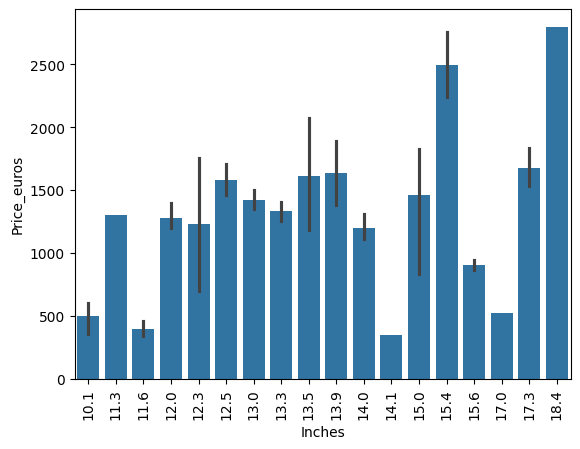

In [425]:
sns.barplot(x=laptops['Inches'], y =laptops['Price_euros'])
plt.xticks(rotation='vertical')
plt.show

## Screen Resolution Column

In [426]:
laptops['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [427]:
# Lets just keep the numbers and TouchScreen info
laptops['TouchScreen']=laptops['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
laptops.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0


In [428]:
laptops['TouchScreen'].value_counts()

,count
TouchScreen,
0,1111
1,192


<Axes: xlabel='TouchScreen', ylabel='Price_euros'>

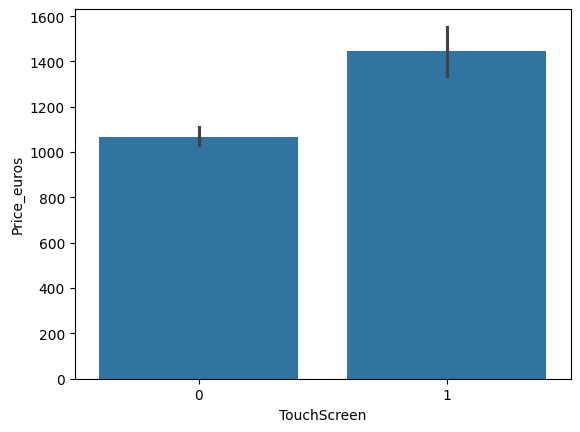

In [429]:
sns.barplot(x=laptops['TouchScreen'], y=laptops['Price_euros'])

In [430]:
laptops['Ips']=laptops['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
laptops.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0


In [431]:
laptops['Ips'].value_counts()

,count
Ips,
0,938
1,365


<Axes: xlabel='Ips', ylabel='Price_euros'>

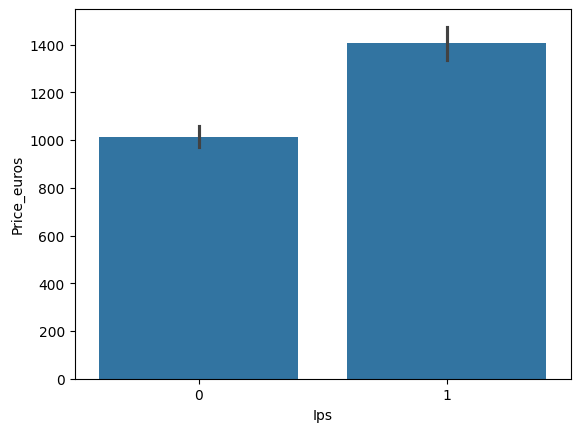

In [432]:
sns.barplot(x=laptops['Ips'], y=laptops['Price_euros'])

In [433]:
# Lets get the resolutions of each laptop
new_df = laptops['ScreenResolution'].str.split('x', n=1, expand=True)

In [434]:
laptops['x_resolution'] = new_df[0]
laptops['y_resolution'] = new_df[1]

In [435]:
laptops.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,x_resolution,y_resolution
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900


In [436]:
laptops['x_resolution'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

,x_resolution
0,2560
1,1440
2,1920
3,2880
4,2560
...,...
1298,1920
1299,3200
1300,1366
1301,1366


In [437]:
laptops['x_resolution'] = laptops['x_resolution'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])
laptops.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,x_resolution,y_resolution
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900


In [438]:
laptops['x_resolution'] = laptops['x_resolution'].astype('int32')
laptops['y_resolution'] = laptops['y_resolution'].astype('int32')

In [439]:
# Find the PPI of the laptops --> x^2+y^2/inches
laptops['PPI'] = ((laptops['x_resolution'] **2 + laptops['y_resolution'] **2)**0.5)/laptops['Inches'].astype('float')

In [440]:
laptops.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,x_resolution,y_resolution,PPI
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940


In [441]:
laptops.drop(columns=['ScreenResolution', 'Inches', 'x_resolution', 'y_resolution'], inplace = True)

In [442]:
laptops.head(2)

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,PPI
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940


## The CPU column

In [443]:
laptops.head(2)

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,PPI
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940


In [444]:
laptops['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


In [445]:
# Lets make 5 other columns: i7, i5, i3, other intel, amd
laptops['CpuName'] = laptops['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [446]:
laptops.head(2)

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,PPI,CpuName
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5


In [447]:
def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  else:
    if text.split()[0] == 'Intel':
      return "Other Intel Processor"
    else:
      return "AMD Processor"

In [448]:
laptops['CpuBrand'] = laptops['CpuName'].apply(fetch_processor)

In [449]:
laptops.head(3)

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,PPI,CpuName,CpuBrand
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5


<Axes: xlabel='CpuBrand'>

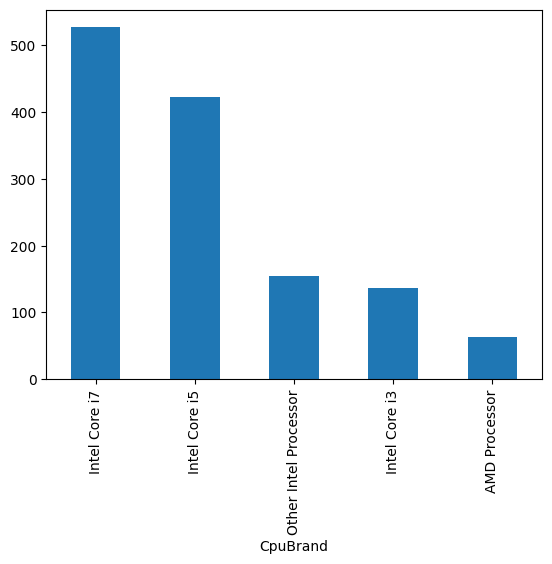

In [450]:
laptops['CpuBrand'].value_counts().plot(kind= 'bar')

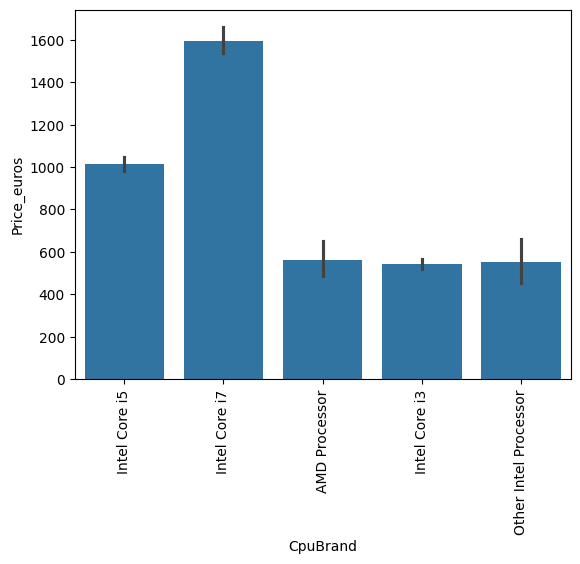

In [451]:
sns.barplot(x=laptops['CpuBrand'], y=laptops['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

In [452]:
laptops.drop(columns=['Cpu', 'CpuName'], inplace = True)

In [453]:
laptops.head(3)

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,PPI,CpuBrand
0,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5


## RAM column

<Axes: xlabel='Ram'>

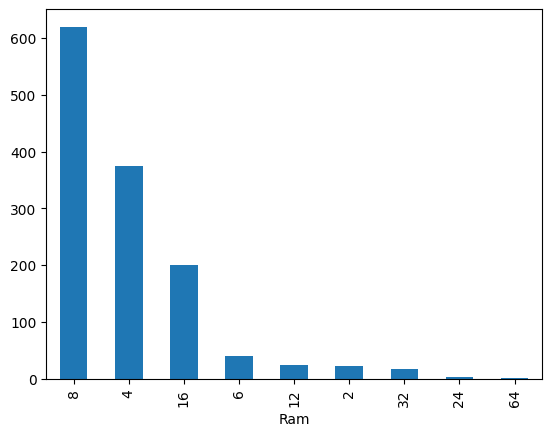

In [454]:
laptops['Ram'].value_counts().plot(kind='bar')

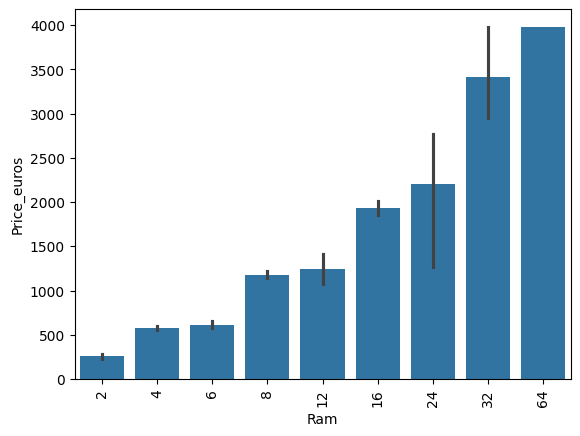

In [455]:
sns.barplot(x=laptops['Ram'], y=laptops['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

## Memory Column

In [456]:
laptops['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [457]:
# Lets make 4 columns: Hybrid, HDD, SSD, Flashdrive

laptops['Memory'] = laptops['Memory'].astype(str).replace('\.0', '', regex=True)
laptops["Memory"] = laptops["Memory"].str.replace('GB', '')
laptops["Memory"] = laptops["Memory"].str.replace('TB', '000')
new = laptops["Memory"].str.split("+", n=1, expand=True)

laptops["first"] = new[0]
laptops["first"] = laptops["first"].str.strip()

laptops["second"] = new[1]

laptops["Layer1HDD"] = laptops["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptops["Layer1SSD"] = laptops["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptops["Layer1Hybrid"] = laptops["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptops["Layer1Flash_Storage"] = laptops["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptops['first'] = laptops['first'].str.replace(r'\D', '')

laptops["second"].fillna("0", inplace=True)

laptops["Layer2HDD"] = laptops["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptops["Layer2SSD"] = laptops["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptops["Layer2Hybrid"] = laptops["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptops["Layer2Flash_Storage"] = laptops["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Replace non-numeric characters in 'first' and 'second' columns
laptops["first"] = laptops["first"].str.extract(r'(\d+)').fillna(0)
laptops["second"] = laptops["second"].str.extract(r'(\d+)').fillna(0)

# Convert cleaned columns to integers
laptops["first"] = laptops["first"].astype(int)
laptops["second"] = laptops["second"].astype(int)

# Proceed with the rest of the logic
laptops["HDD"] = (laptops["first"] * laptops["Layer1HDD"] + laptops["second"] * laptops["Layer2HDD"])
laptops["SSD"] = (laptops["first"] * laptops["Layer1SSD"] + laptops["second"] * laptops["Layer2SSD"])
laptops["Hybrid"] = (laptops["first"] * laptops["Layer1Hybrid"] + laptops["second"] * laptops["Layer2Hybrid"])
laptops["Flash_Storage"] = (laptops["first"] * laptops["Layer1Flash_Storage"] + laptops["second"] * laptops["Layer2Flash_Storage"])

# Drop intermediate columns
laptops.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'], inplace=True)

<ipython-input-457-871aa1f7704b>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laptops["second"].fillna("0", inplace=True)


In [458]:
laptops.sample(3)

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,PPI,CpuBrand,HDD,SSD,Hybrid,Flash_Storage
59,Asus,X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux),Notebook,4,256 SSD,Intel HD Graphics 520,Linux,2.00,415.00,0,0,141.211998,Intel Core i3,0,256,0,0
139,HP,Envy 13-AD007nv,Notebook,4,256 SSD,Intel HD Graphics 620,Windows 10,1.32,699.00,0,1,165.632118,Intel Core i5,0,256,0,0
15,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1518.55,0,1,226.983005,Intel Core i5,0,256,0,0


In [459]:
laptops.drop(columns=['Memory'], inplace = True)

In [460]:
laptops.head(2)

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,PPI,CpuBrand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128


In [461]:
numeric_columns = laptops.select_dtypes(include=['int64', 'float64'])
numeric_columns.corr()['Price_euros']

,Price_euros
Price_euros,1.000000
TouchScreen,0.191226
Ips,0.252208
PPI,0.473487
HDD,-0.096441
SSD,0.670799
Hybrid,0.007989
Flash_Storage,-0.040511


In [462]:
laptops.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)

In [463]:
laptops.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,PPI,CpuBrand,HDD,SSD
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256


## GPU column

In [464]:
laptops.head(3)

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,PPI,CpuBrand,HDD,SSD
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256


In [465]:
laptops['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [466]:
# Lets only consider the brand of GPU since we have less data
laptops['Gpu'].apply(lambda x: x.split()[0])

,Gpu
0,Intel
1,Intel
2,Intel
3,AMD
4,Intel
...,...
1298,Intel
1299,Intel
1300,Intel
1301,AMD


In [467]:
laptops['GpuBrand'] = laptops['Gpu'].apply(lambda x: x.split()[0])

In [468]:
laptops.head(2)

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,Ips,PPI,CpuBrand,HDD,SSD,GpuBrand
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel


In [469]:
laptops['GpuBrand'].value_counts()

,count
GpuBrand,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [470]:
# Remove ARM
laptops = laptops[laptops['GpuBrand'] != 'ARM']

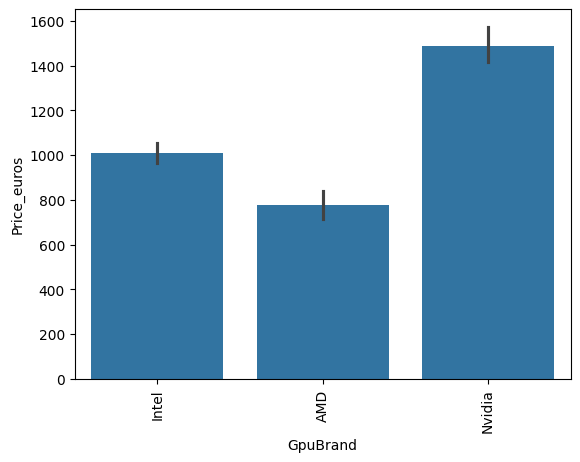

In [471]:
sns.barplot(x=laptops['GpuBrand'], y=laptops['Price_euros'])
plt.xticks(rotation = 'vertical')
plt.show()

In [472]:
laptops.drop(columns=['Gpu'], inplace=True)

In [473]:
laptops.head(2)

,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,TouchScreen,Ips,PPI,CpuBrand,HDD,SSD,GpuBrand
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel


## OS column

In [474]:
laptops['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

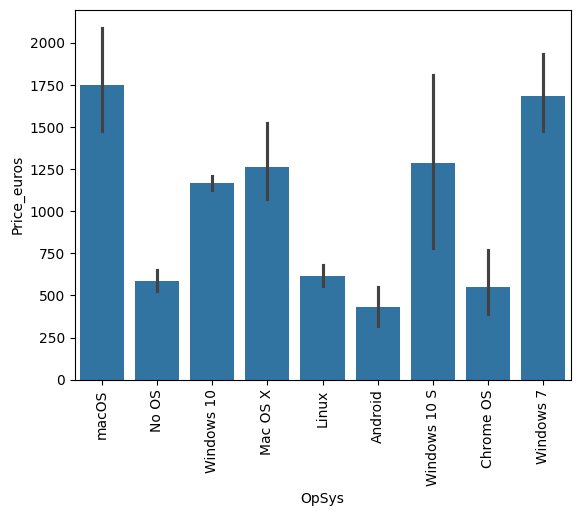

In [475]:
sns.barplot(x=laptops['OpSys'], y=laptops['Price_euros'])
plt.xticks(rotation = 'vertical')

In [476]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [477]:
laptops['os'] = laptops['OpSys'].apply(cat_os)

In [478]:
laptops.head(2)

,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,TouchScreen,Ips,PPI,CpuBrand,HDD,SSD,GpuBrand,os
0,Apple,MacBook Pro,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


In [479]:
laptops.drop(columns=['OpSys'], inplace = True)

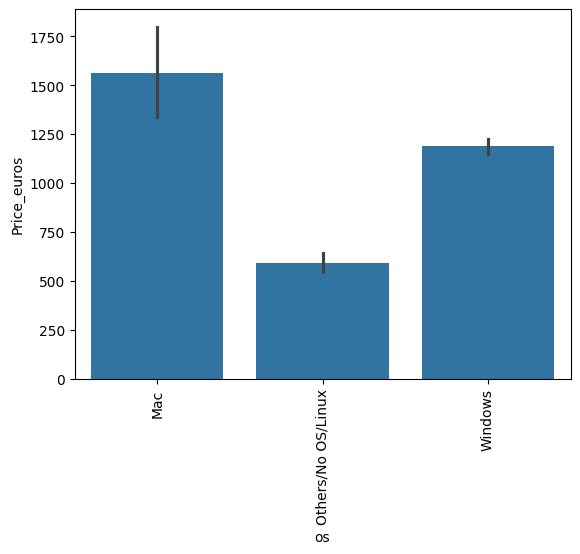

In [480]:
sns.barplot(x=laptops['os'],y=laptops['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

## Weight Column

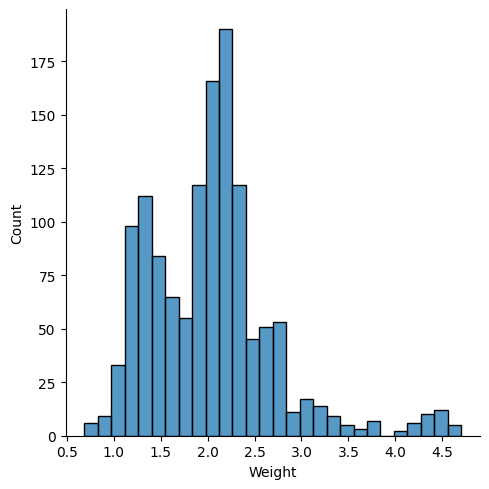

In [481]:
sns.displot(laptops['Weight'])

In [482]:
numeric_columns = laptops.select_dtypes(include=['int64', 'float64'])
numeric_columns.corr()['Price_euros']

,Price_euros
Price_euros,1.000000
TouchScreen,0.192917
Ips,0.253320
PPI,0.475368
HDD,-0.096891
SSD,0.670660


<Axes: >

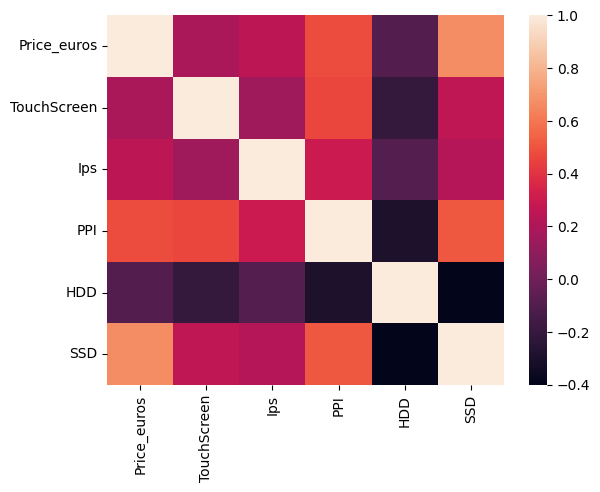

In [483]:
sns.heatmap(numeric_columns.corr())

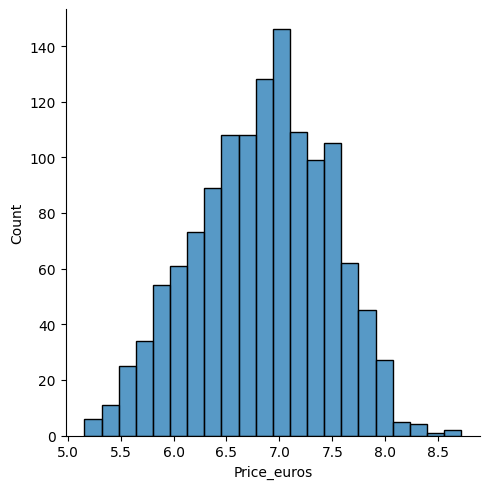

In [484]:
# Convert our Price column into normal form(remember it was skewed), using log transformation
sns.displot(np.log(laptops['Price_euros']))

In [485]:
laptops.head(2)

,Company,Product,TypeName,Ram,Weight,Price_euros,TouchScreen,Ips,PPI,CpuBrand,HDD,SSD,GpuBrand,os
0,Apple,MacBook Pro,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


In [494]:
laptops.drop(columns=['Product'], inplace=True)
x = laptops.drop(columns=['Price_euros'])
y = np.log(laptops['Price_euros'])

In [495]:
x

,Company,TypeName,Ram,Weight,TouchScreen,Ips,PPI,CpuBrand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [496]:
y

,Price_euros
0,7.200194
1,6.801216
2,6.354370
3,7.838915
4,7.497540
...,...
1298,6.458338
1299,7.312553
1300,5.433722
1301,6.638568


# Machine Learning

In [497]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

In [498]:
x_train

,Company,TypeName,Ram,Weight,TouchScreen,Ips,PPI,CpuBrand,HDD,SSD,GpuBrand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [499]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [500]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Linear Regression

In [501]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.807327744841864
MAE 0.21017827976428785


In [502]:
np.exp(0.21) # one euro difference

1.2336780599567432

## Ridge Regression

In [506]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8127331031311809
MAE 0.20926802242582968


## LASSO Regression

In [507]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071853945317102
MAE 0.21114361613472601


KNN

In [508]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8017673664034364
MAE 0.1934611818379853


Decision Tree

In [509]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8382944529806925
MAE 0.1837388805677101


SVM

In [510]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8082689367595132
MAE 0.20241526848129138


Random Forest

In [511]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8869298852190862
MAE 0.15821495548860307


Extra Trees

In [513]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                            bootstrap = True,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.887242132689341
MAE 0.15904075521443906


AdaBoost

In [514]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7902428469077691
MAE 0.2326212402047691


Gradient Boost

In [515]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8818816310702081
MAE 0.1593680534694617


In [521]:
# THis is the best on Random forest. so run it at the end

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8869298852190862
MAE 0.15821495548860307


# Export

In [522]:
import pickle

In [524]:
pickle.dump(laptops, open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [527]:
from google.colab import files
# files.download('df.pkl')
files.download('pipe.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [528]:
x_train

,Company,TypeName,Ram,Weight,TouchScreen,Ips,PPI,CpuBrand,HDD,SSD,GpuBrand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux
